In [1]:
!pip install git+https://github.com/hendry24/Quantum_Oscillators_in_Python

  Cloning https://github.com/hendry24/Quantum_Oscillators_in_Python to /tmp/pip-req-build-tr9sxigi
  Running command git clone --filter=blob:none --quiet https://github.com/hendry24/Quantum_Oscillators_in_Python /tmp/pip-req-build-tr9sxigi
  Resolved https://github.com/hendry24/Quantum_Oscillators_in_Python to commit 3b01b2493f440fff08164fea0cd13b5de90719a5
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 53.2 MB/s eta 0:00:00
  Created wheel for pyqosc: filename=pyqosc-0.0.34-py3-none-any.whl size=41063 sha256=0db6c2e6f83f871dda8a585c2f25d26666abc18c693134790125c514f8f21e17
  Stored in directory: /tmp/pip-ephem-wheel-cache-hq_l0lxi/wheels/b5/96/4e/bfeeac0692baeabdbaf2574d15b3f41a3aa4d9efc90e63ef7d
Successfully built pyqosc


In [12]:
import numpy as np
import matplotlib.pyplot as plt
import qutip as qt
import pyqosc as qo
import math

---

---

In this notebook we shall take a look at the trajectory of the phase point $\left\langle\beta\right\rangle=\mathrm{Tr}\left\{\rho\hat{b}\right\}$ from its initial to its final (stead state) value. This is useful since we can determine which shortcut trajectory to use for a given set of parameters and get the best figure of merit.

A thermal state and a number state has zero expectation value for the annihilation operator. Since we are only looking at the phase point trajectory and the steady-state is independent of the initial state, we can just use one of them for comparison.

---

---

**No detuning, no driving, weakly nonlinear regime**

In [55]:
N = 40
timelst = np.linspace(0, 30, 501)
def sim(omega = 1, Omega_1 = 0, Omega_2 = 1, gamma_2 = 0.1, rho_0_lst = [qt.coherent_dm(N, 2 * np.exp(1j*np.pi*1.5))]):

  vdp = qo.vdp(N = N,
        omega = omega,
        Omega_1 = Omega_1,
        Omega_2 = Omega_2,
        gamma_2 = gamma_2)

  Ham,c_ops = vdp.dynamics()
  do = True
  try:
    rho_ss = qt.steadystate(Ham, c_ops)
    b_ss = qt.expect(qt.destroy(N), rho_ss)
  except:
    do = False

  fig, ax = plt.subplots(1, l:=len(rho_0_lst), constrained_layout = True, figsize = (15, 5))
  for i in range(l):
    vdp.evolve(rho_0 = rho_0_lst[i],
              timelst = timelst,
              expect = [qt.destroy(N)],
              plot = True,
              overlap_with = ax[i])
    if do:
      ax[i].scatter(np.real(b_ss), np.imag(b_ss), color = "cyan")

  ax = plt.gca()
  if do:
    ax.scatter(np.real(b_ss), np.imag(b_ss), color = "cyan", label = "steady state")
  ax.legend(loc="best")
  plt.show()


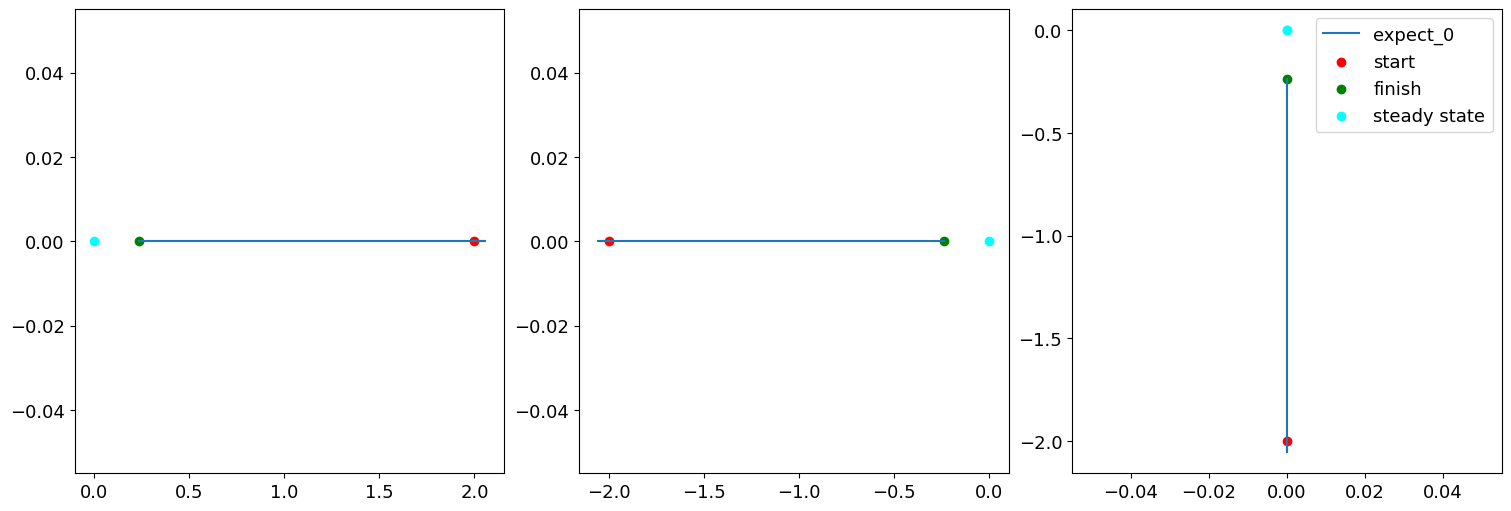

In [39]:
sim(omega = 1,
    Omega_1 = 0,
    Omega_2 = 0,
    gamma_2 = 0.1,
    rho_0_lst = [qt.coherent_dm(N, 2*np.exp(1j*2*np.pi)), qt.coherent_dm(N, 2*np.exp(1j*np.pi)), qt.coherent_dm(N, 2*np.exp(1j*1.5*np.pi))])

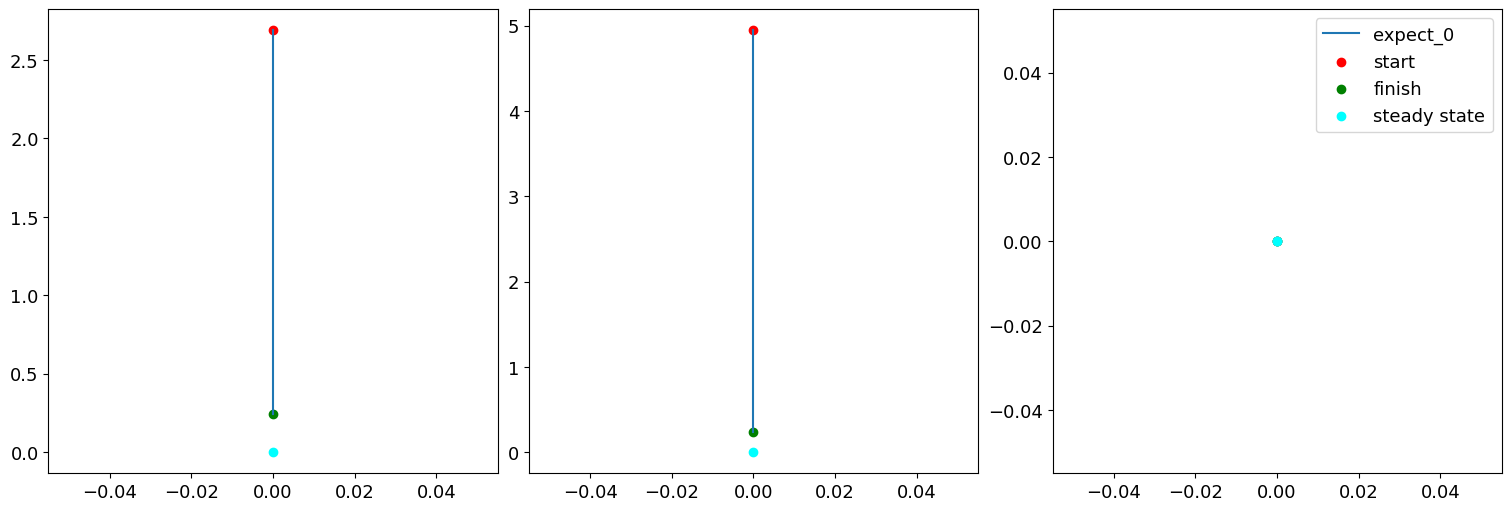

In [40]:
sim(omega = 1,
    Omega_1 = 0,
    Omega_2 = 0,
    gamma_2 = 0.1,
    rho_0_lst = [qt.coherent_dm(N, 10*np.exp(1j*1.5*np.pi)), qt.coherent_dm(N, 20*np.exp(1j*1.5*np.pi)), qt.fock_dm(N, 20)])

The trajectory is always a straight line towards the origin. Nothing interesting here.

---

---

**No detuning, no driving, strongly nonlinear regime**

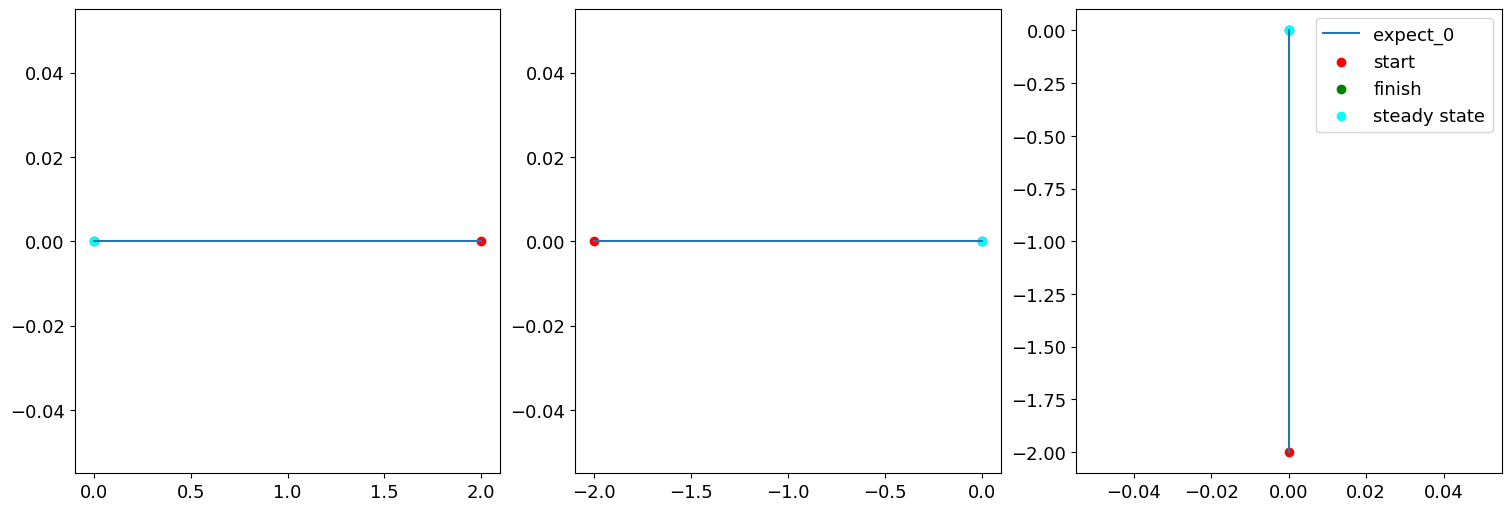

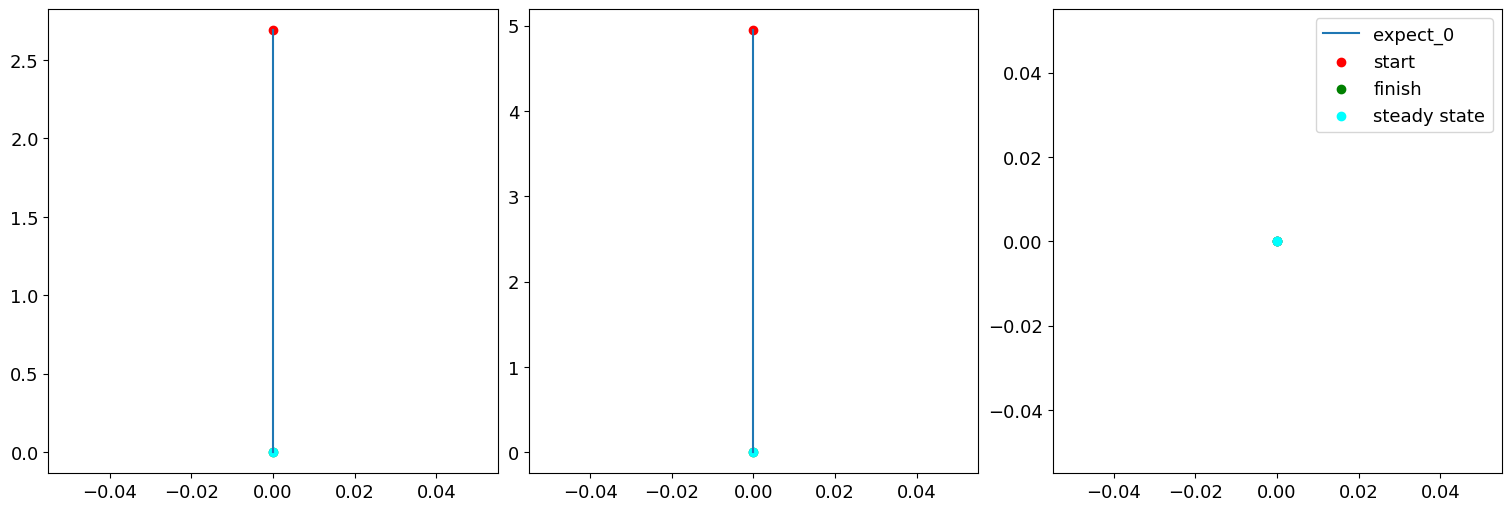

In [41]:
sim(omega = 1,
    Omega_1 = 0,
    Omega_2 = 0,
    gamma_2 = 3,
    rho_0_lst = [qt.coherent_dm(N, 2*np.exp(1j*2*np.pi)), qt.coherent_dm(N, 2*np.exp(1j*np.pi)), qt.coherent_dm(N, 2*np.exp(1j*1.5*np.pi))])
sim(omega = 1,
    Omega_1 = 0,
    Omega_2 = 0,
    gamma_2 = 3,
    rho_0_lst = [qt.coherent_dm(N, 10*np.exp(1j*1.5*np.pi)), qt.coherent_dm(N, 20*np.exp(1j*1.5*np.pi)), qt.fock_dm(N, 20)])

---

---

**With detuning, no driving, weakly nonlinear regime**

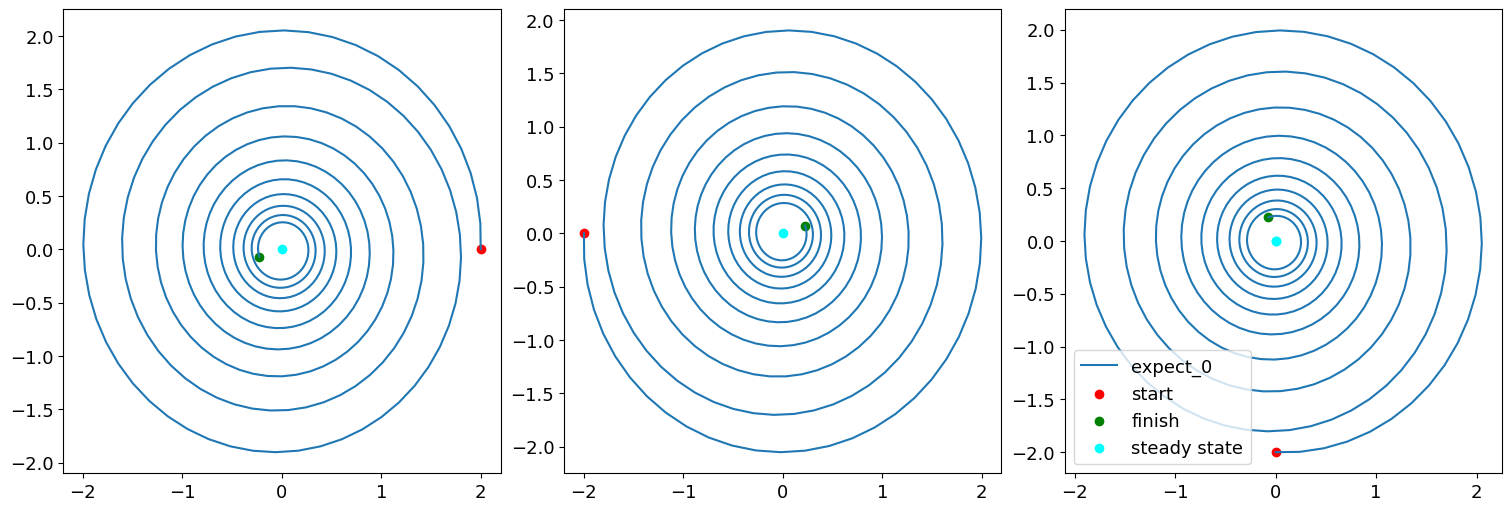

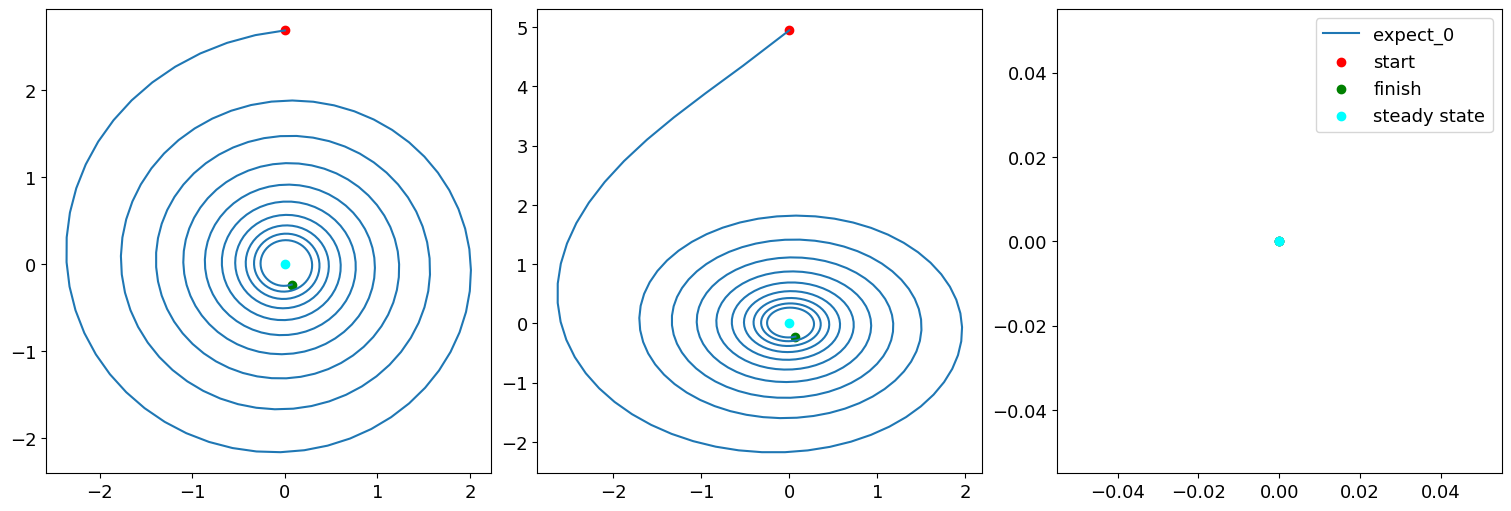

In [42]:
sim(omega = 3,
    Omega_1 = 0,
    Omega_2 = 0,
    gamma_2 = 0.1,
    rho_0_lst = [qt.coherent_dm(N, 2*np.exp(1j*2*np.pi)), qt.coherent_dm(N, 2*np.exp(1j*np.pi)), qt.coherent_dm(N, 2*np.exp(1j*1.5*np.pi))])
sim(omega = 3,
    Omega_1 = 0,
    Omega_2 = 0,
    gamma_2 = 0.1,
    rho_0_lst = [qt.coherent_dm(N, 10*np.exp(1j*1.5*np.pi)), qt.coherent_dm(N, 20*np.exp(1j*1.5*np.pi)), qt.fock_dm(N, 20)])

---

---

**With detuning, no driving, strongly nonlinear regime**

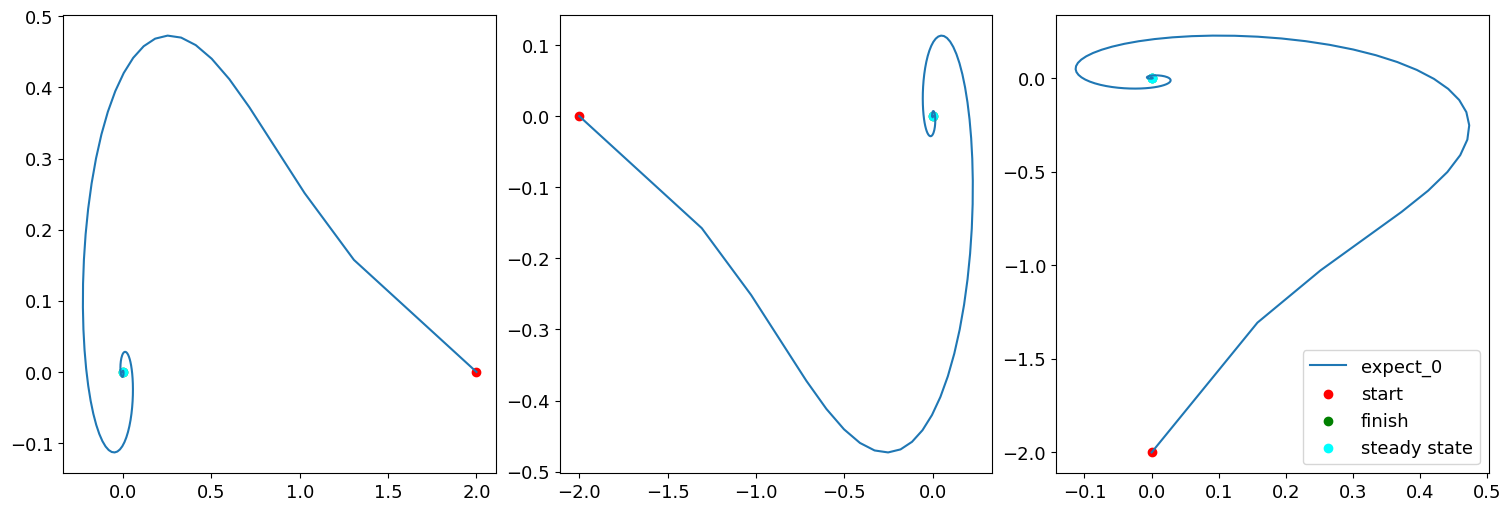

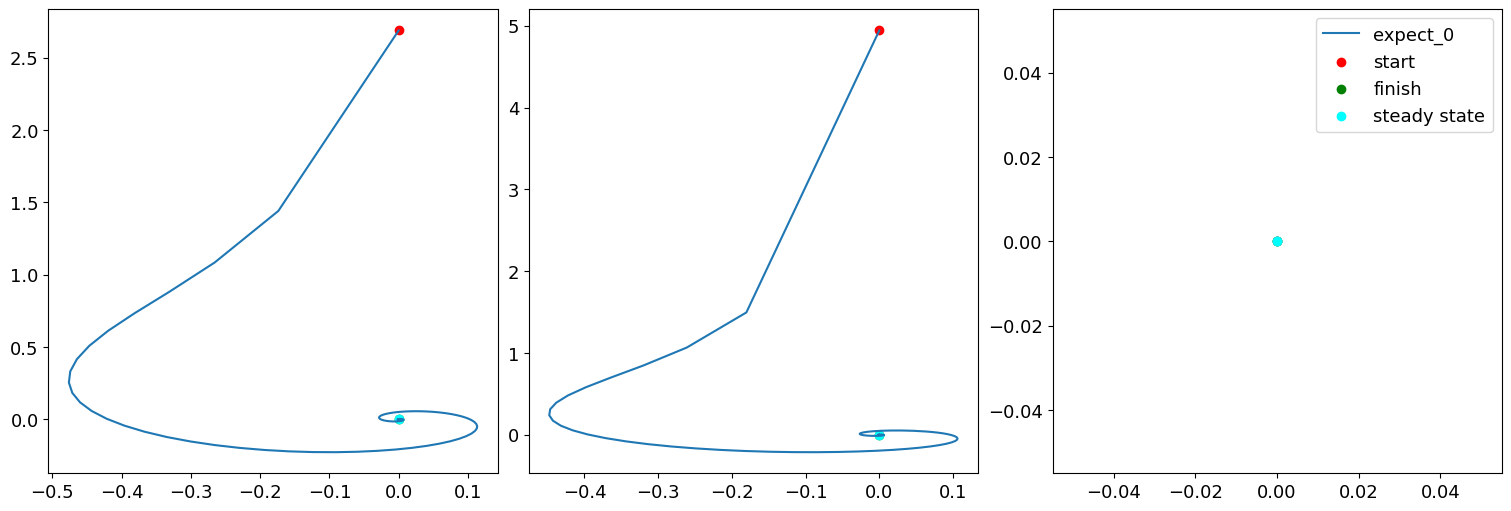

In [43]:
sim(omega = 3,
    Omega_1 = 0,
    Omega_2 = 0,
    gamma_2 = 3,
    rho_0_lst = [qt.coherent_dm(N, 2*np.exp(1j*2*np.pi)), qt.coherent_dm(N, 2*np.exp(1j*np.pi)), qt.coherent_dm(N, 2*np.exp(1j*1.5*np.pi))])
sim(omega = 3,
    Omega_1 = 0,
    Omega_2 = 0,
    gamma_2 = 3,
    rho_0_lst = [qt.coherent_dm(N, 10*np.exp(1j*1.5*np.pi)), qt.coherent_dm(N, 20*np.exp(1j*1.5*np.pi)), qt.fock_dm(N, 20)])

---

---

**No detuning, constant driving, weakly nonlinear regime**

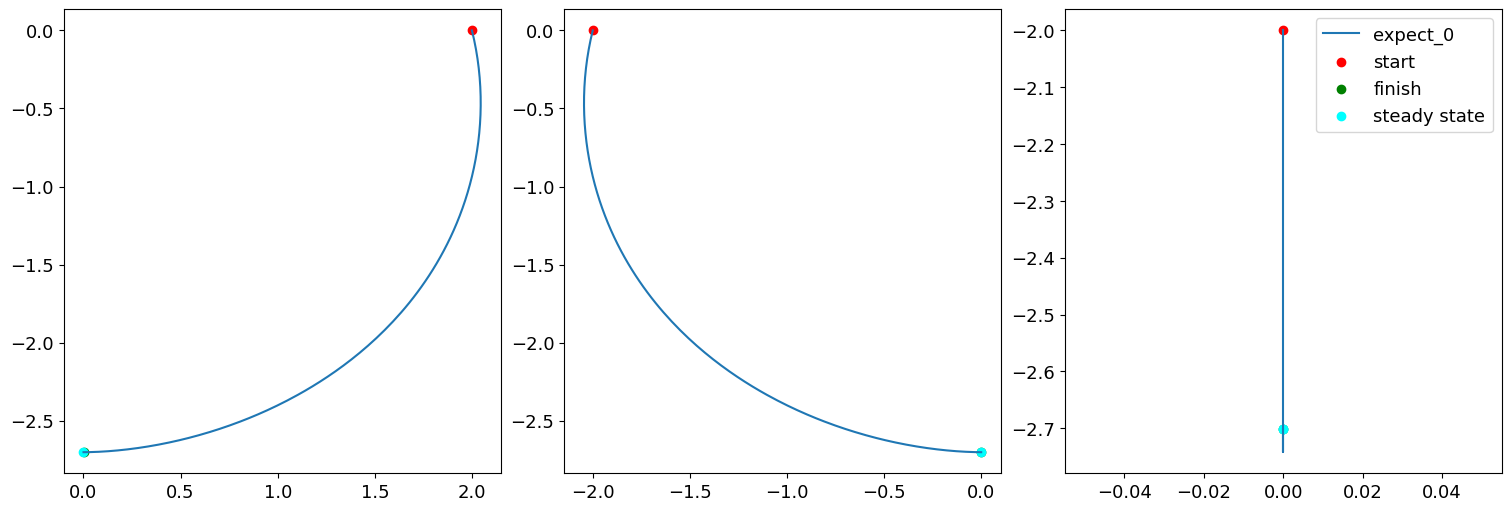

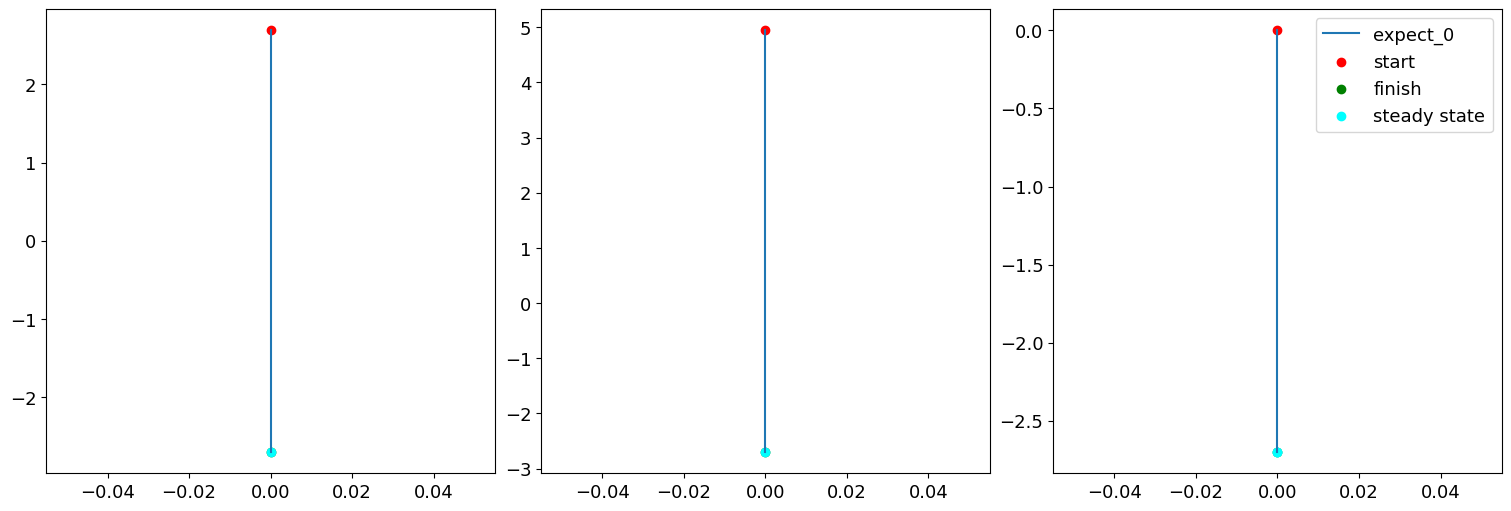

In [46]:
sim(omega = 1,
    Omega_1 = 1,
    Omega_2 = 0,
    gamma_2 = 0.1,
    rho_0_lst = [qt.coherent_dm(N, 2*np.exp(1j*2*np.pi)), qt.coherent_dm(N, 2*np.exp(1j*np.pi)), qt.coherent_dm(N, 2*np.exp(1j*1.5*np.pi))])
sim(omega = 1,
    Omega_1 = 1,
    Omega_2 = 0,
    gamma_2 = 0.1,
    rho_0_lst = [qt.coherent_dm(N, 10*np.exp(1j*1.5*np.pi)), qt.coherent_dm(N, 20*np.exp(1j*1.5*np.pi)), qt.fock_dm(N, 20)])

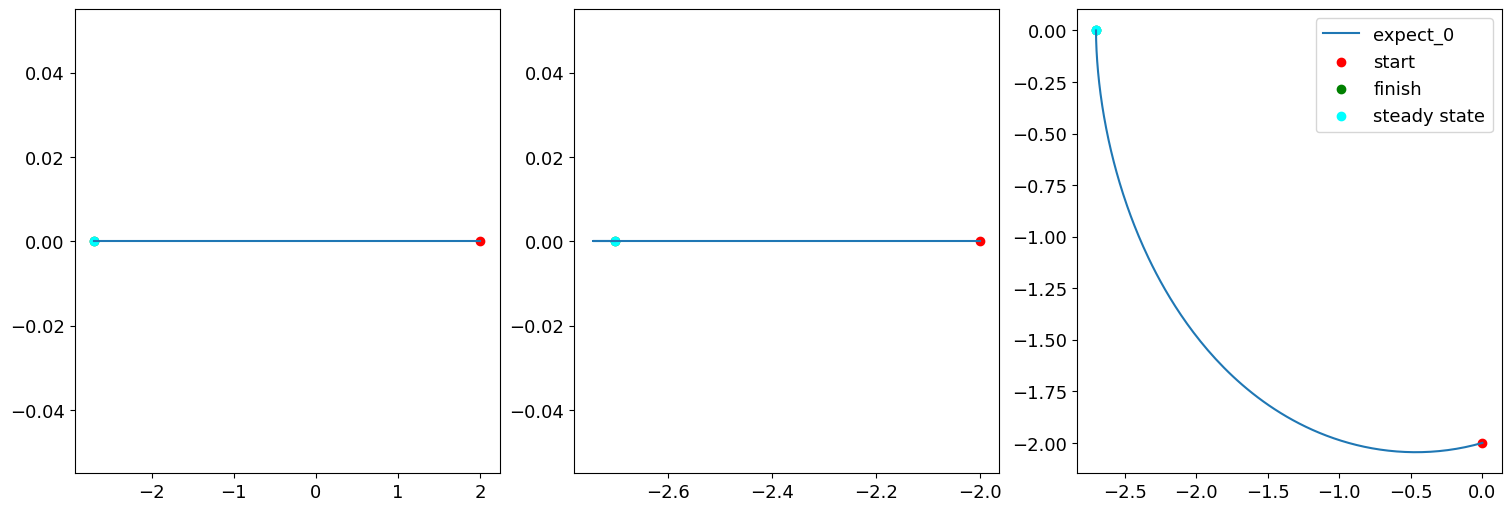

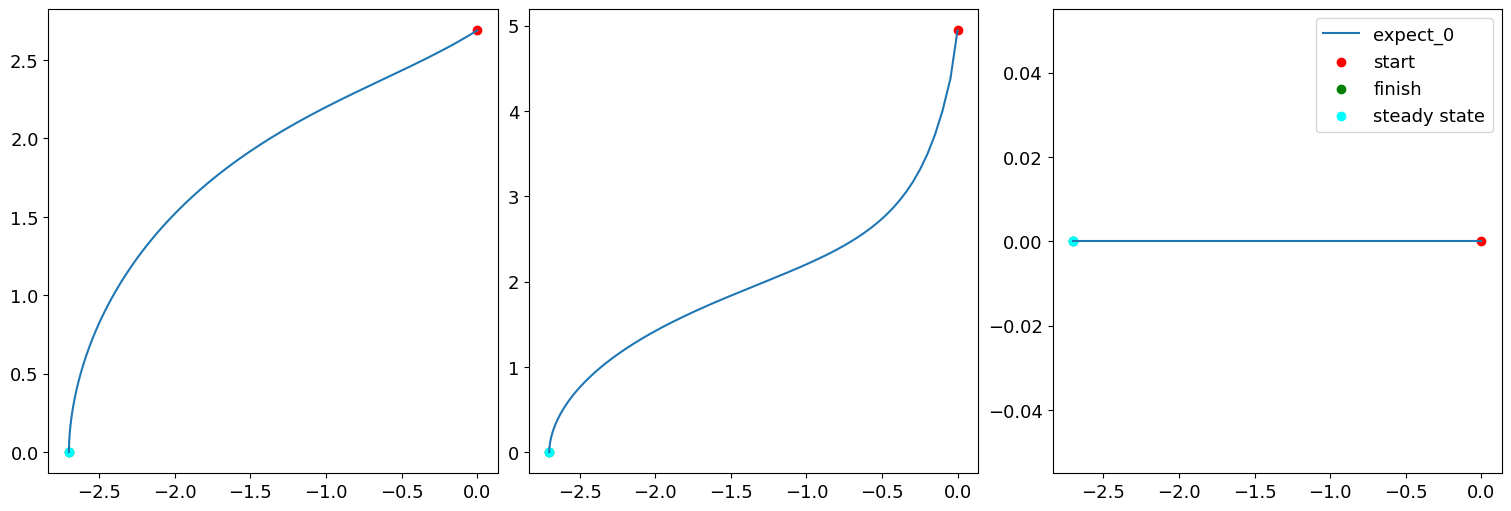

In [47]:
sim(omega = 1,
    Omega_1 = 0,
    Omega_2 = 1,
    gamma_2 = 0.1,
    rho_0_lst = [qt.coherent_dm(N, 2*np.exp(1j*2*np.pi)), qt.coherent_dm(N, 2*np.exp(1j*np.pi)), qt.coherent_dm(N, 2*np.exp(1j*1.5*np.pi))])
sim(omega = 1,
    Omega_1 = 0,
    Omega_2 = 1,
    gamma_2 = 0.1,
    rho_0_lst = [qt.coherent_dm(N, 10*np.exp(1j*1.5*np.pi)), qt.coherent_dm(N, 20*np.exp(1j*1.5*np.pi)), qt.fock_dm(N, 20)])

Since the $\Omega_1$ and $\Omega_2$ driving only differ in the phase, the results only differ according to the phase of the initial coherent phase. Let us use $\Omega_1=0$, $\Omega_2=1$ herein.

---

---

**No detuning, constant driving, strongly nonlinear regime**

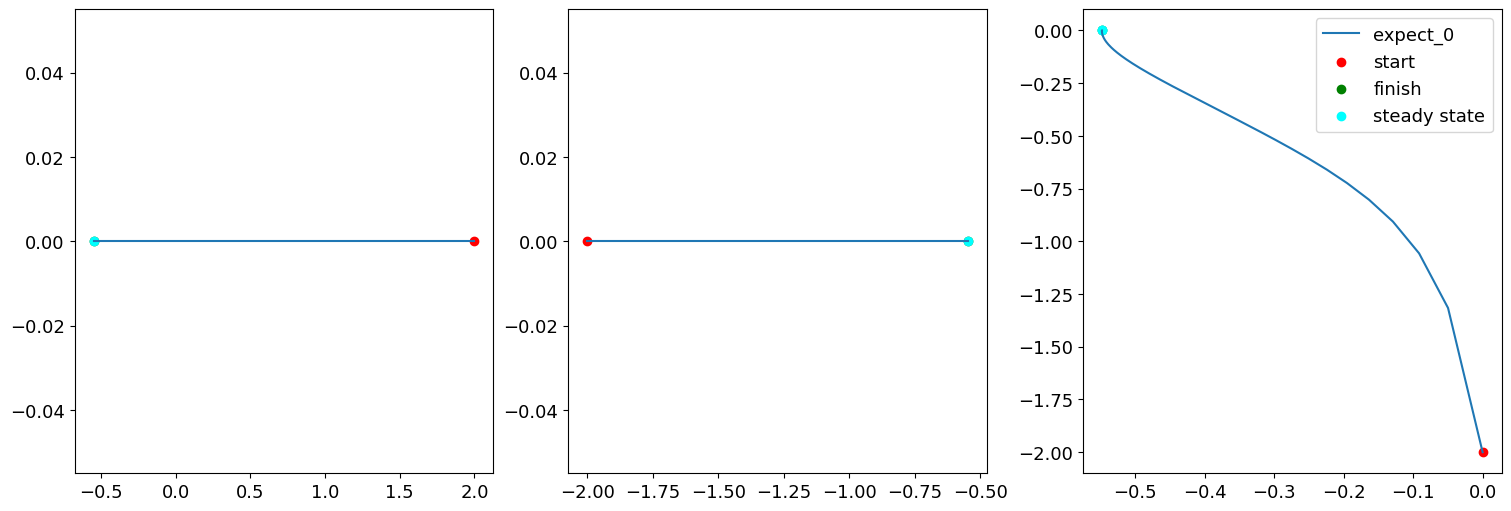

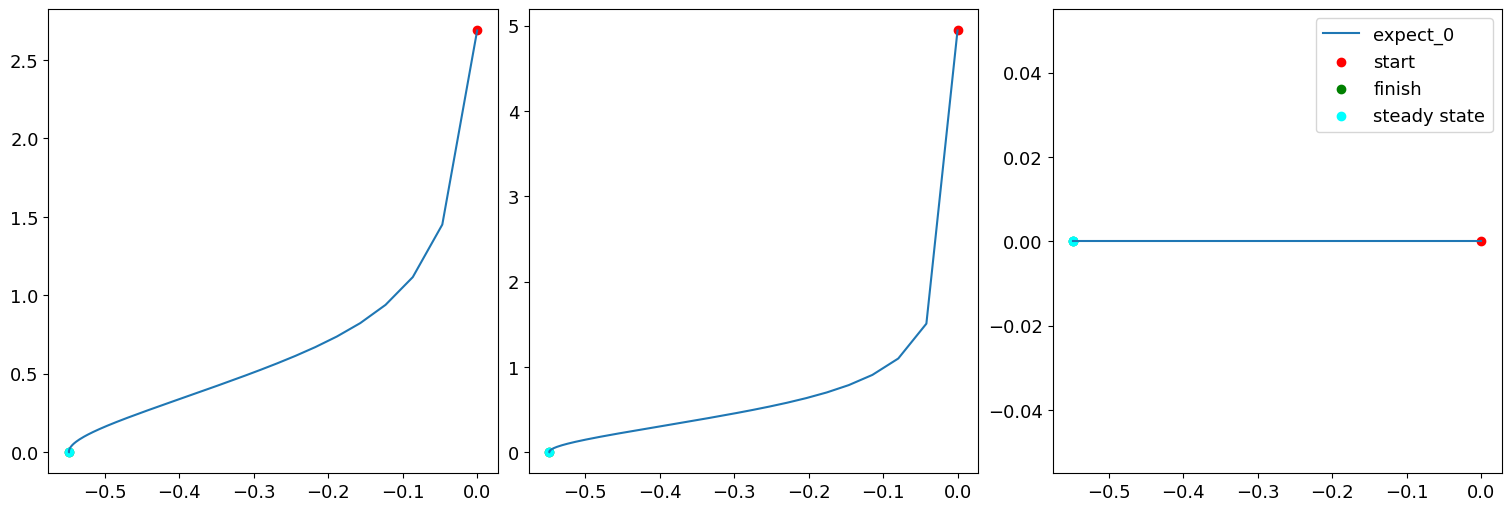

In [48]:
sim(omega = 1,
    Omega_1 = 0,
    Omega_2 = 1,
    gamma_2 = 3,
    rho_0_lst = [qt.coherent_dm(N, 2*np.exp(1j*2*np.pi)), qt.coherent_dm(N, 2*np.exp(1j*np.pi)), qt.coherent_dm(N, 2*np.exp(1j*1.5*np.pi))])
sim(omega = 1,
    Omega_1 = 0,
    Omega_2 = 1,
    gamma_2 = 3,
    rho_0_lst = [qt.coherent_dm(N, 10*np.exp(1j*1.5*np.pi)), qt.coherent_dm(N, 20*np.exp(1j*1.5*np.pi)), qt.fock_dm(N, 20)])

---

---

**With detuning, constant driving, weakly nonlinear regime**

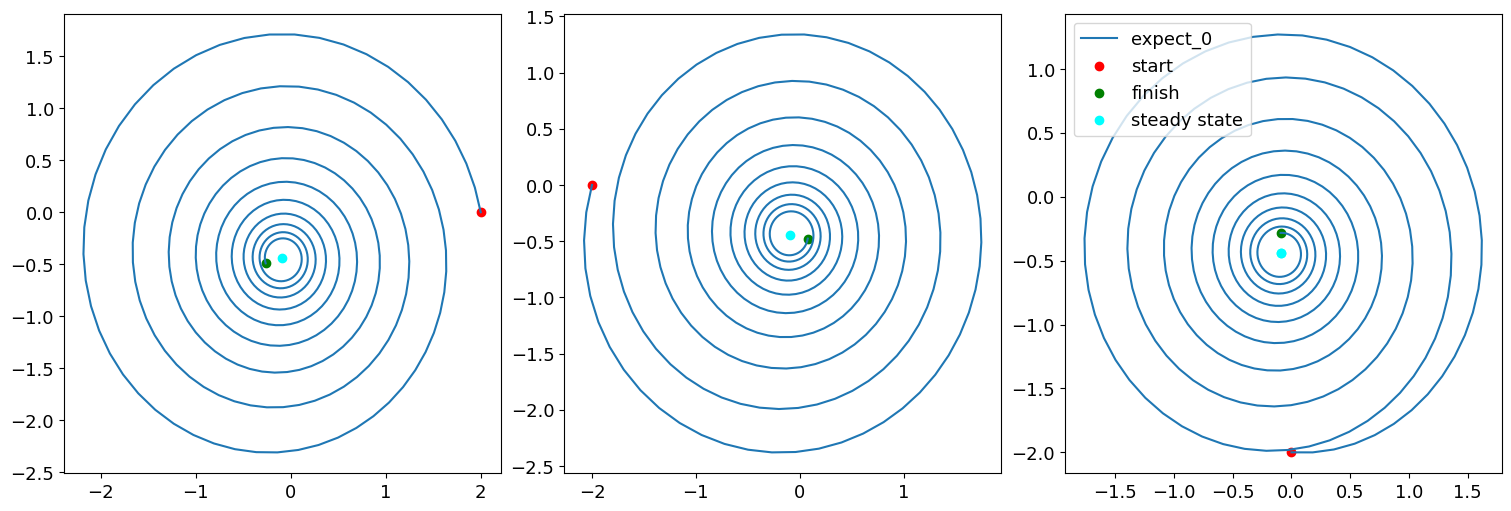

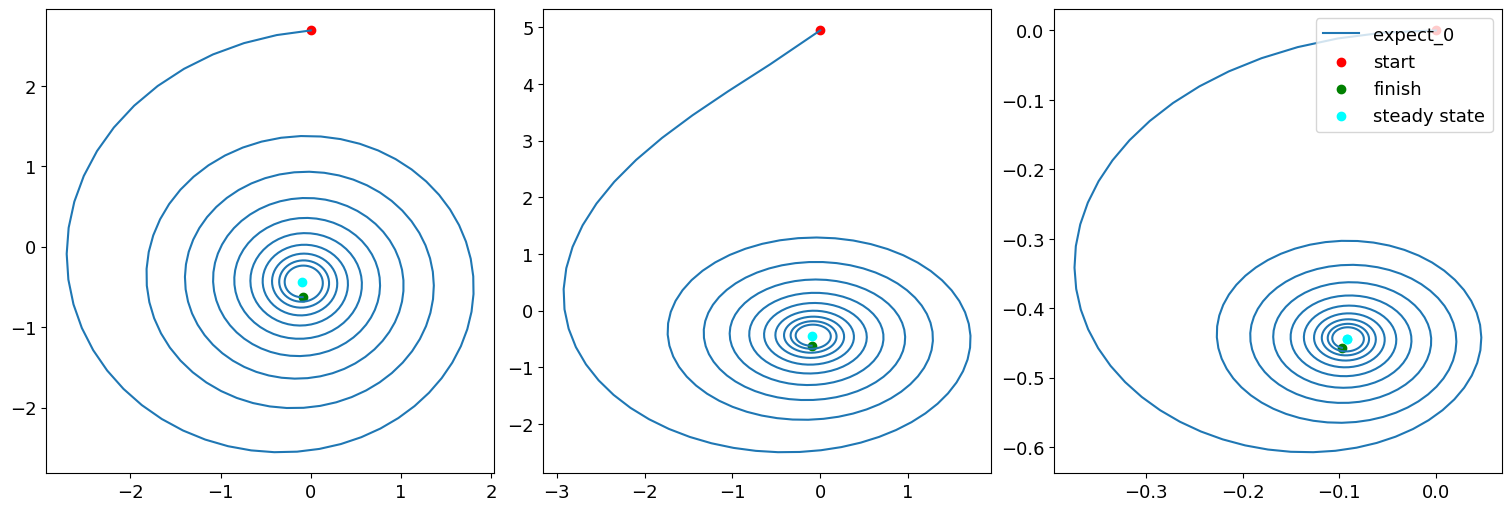

In [49]:
sim(omega = 3,
    Omega_1 = 0,
    Omega_2 = 1,
    gamma_2 = 0.1,
    rho_0_lst = [qt.coherent_dm(N, 2*np.exp(1j*2*np.pi)), qt.coherent_dm(N, 2*np.exp(1j*np.pi)), qt.coherent_dm(N, 2*np.exp(1j*1.5*np.pi))])
sim(omega = 3,
    Omega_1 = 0,
    Omega_2 = 1,
    gamma_2 = 0.1,
    rho_0_lst = [qt.coherent_dm(N, 10*np.exp(1j*1.5*np.pi)), qt.coherent_dm(N, 20*np.exp(1j*1.5*np.pi)), qt.fock_dm(N, 20)])

---

---

**With detuning, constant driving, strongly nonlinear regime**

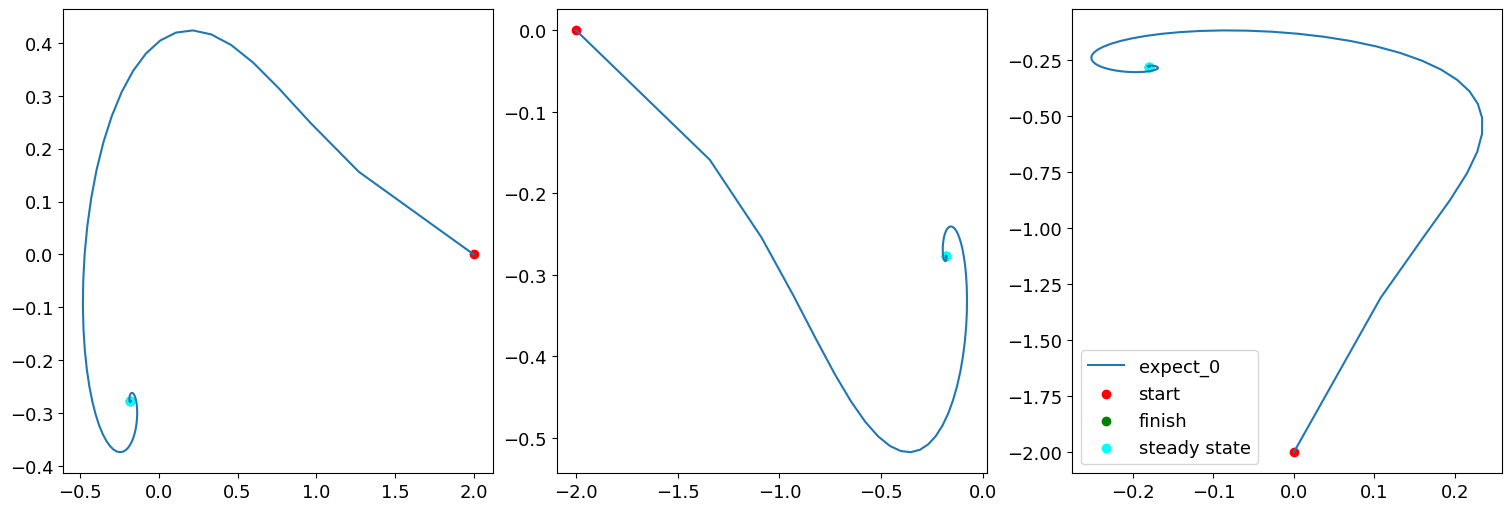

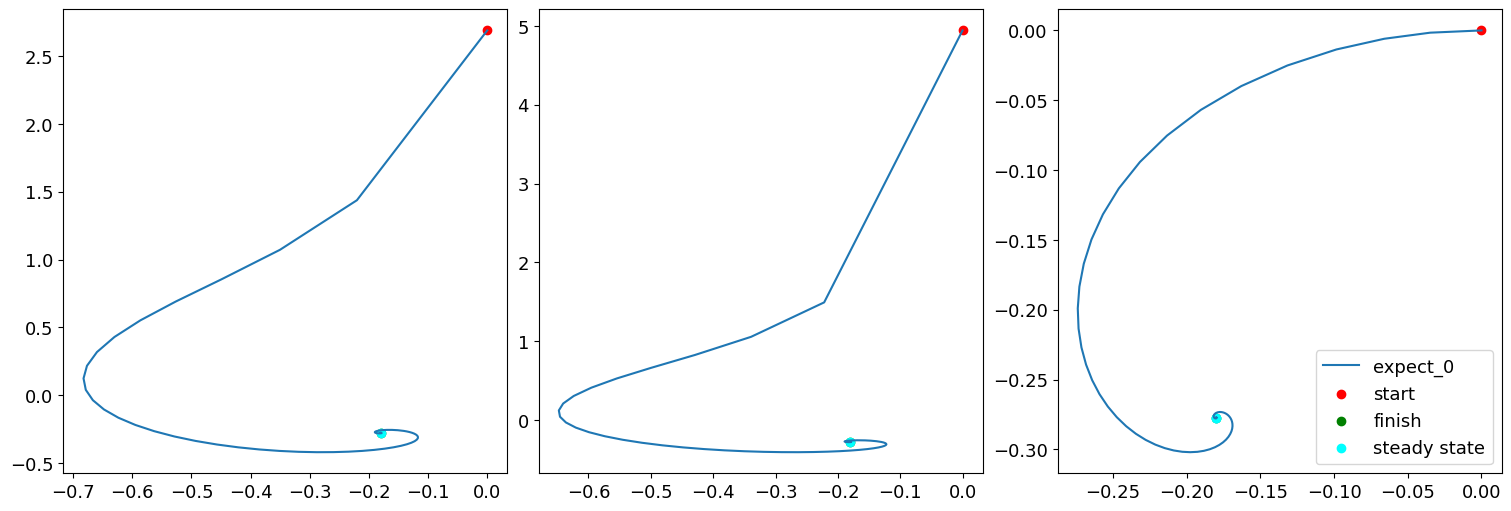

In [50]:
sim(omega = 3,
    Omega_1 = 0,
    Omega_2 = 1,
    gamma_2 = 3,
    rho_0_lst = [qt.coherent_dm(N, 2*np.exp(1j*2*np.pi)), qt.coherent_dm(N, 2*np.exp(1j*np.pi)), qt.coherent_dm(N, 2*np.exp(1j*1.5*np.pi))])
sim(omega = 3,
    Omega_1 = 0,
    Omega_2 = 1,
    gamma_2 = 3,
    rho_0_lst = [qt.coherent_dm(N, 10*np.exp(1j*1.5*np.pi)), qt.coherent_dm(N, 20*np.exp(1j*1.5*np.pi)), qt.fock_dm(N, 20)])

---

---

**No detuning, modulated driving, weakly nonlinear regime**

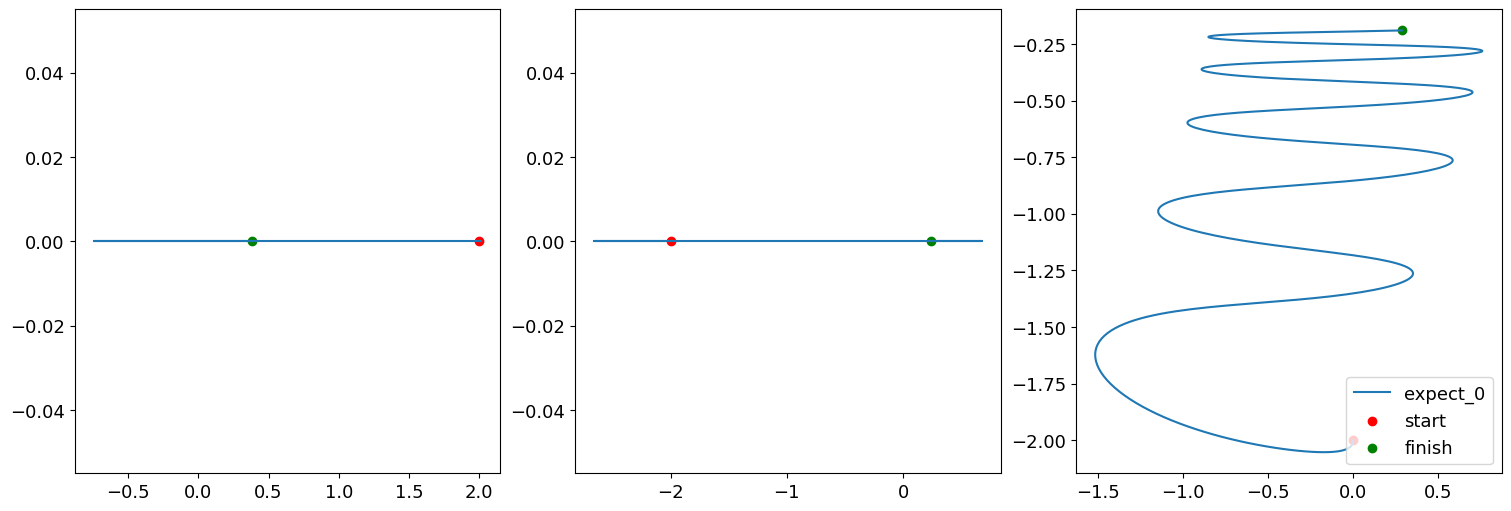

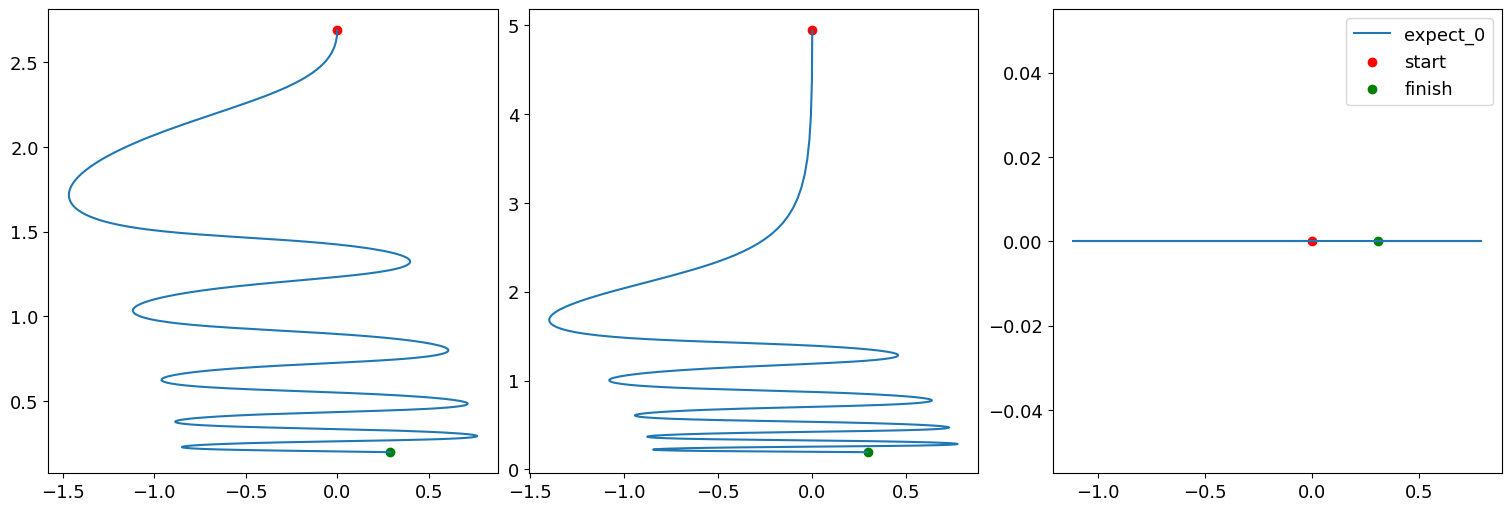

In [56]:
sim(omega = 1,
    Omega_1 = 0,
    Omega_2 = np.sin(timelst),
    gamma_2 = 0.1,
    rho_0_lst = [qt.coherent_dm(N, 2*np.exp(1j*2*np.pi)), qt.coherent_dm(N, 2*np.exp(1j*np.pi)), qt.coherent_dm(N, 2*np.exp(1j*1.5*np.pi))])
sim(omega = 1,
    Omega_1 = 0,
    Omega_2 = np.sin(timelst),
    gamma_2 = 0.1,
    rho_0_lst = [qt.coherent_dm(N, 10*np.exp(1j*1.5*np.pi)), qt.coherent_dm(N, 20*np.exp(1j*1.5*np.pi)), qt.fock_dm(N, 20)])

---

---

**No detuning, modulated driving, strongly nonlinear regime**

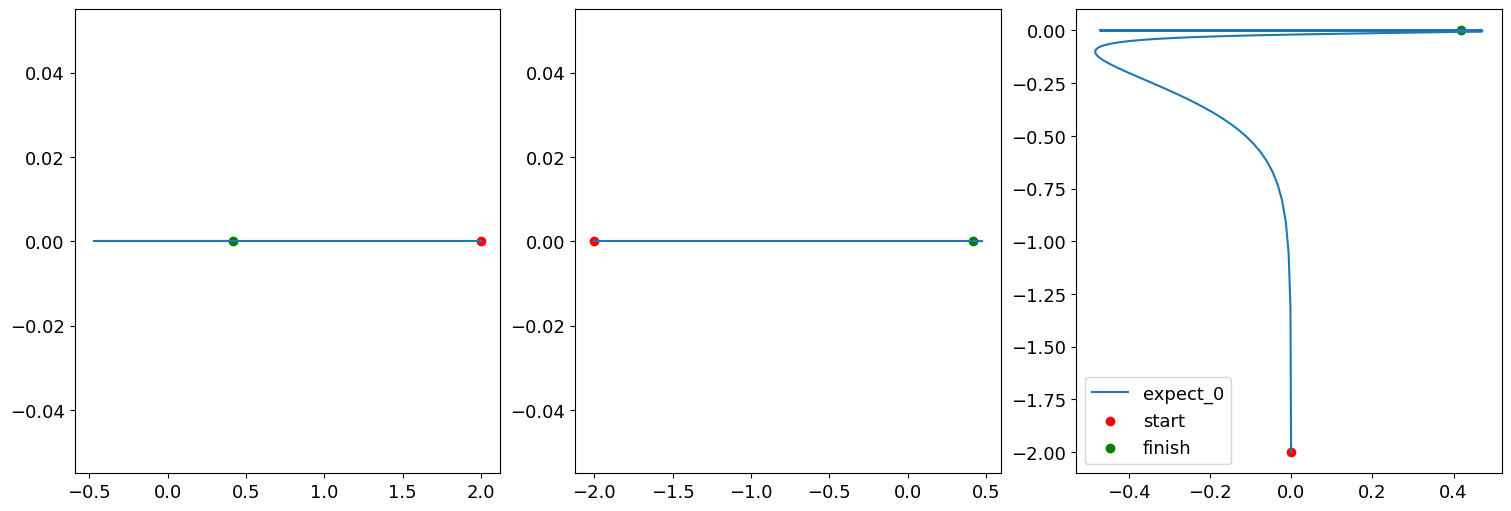

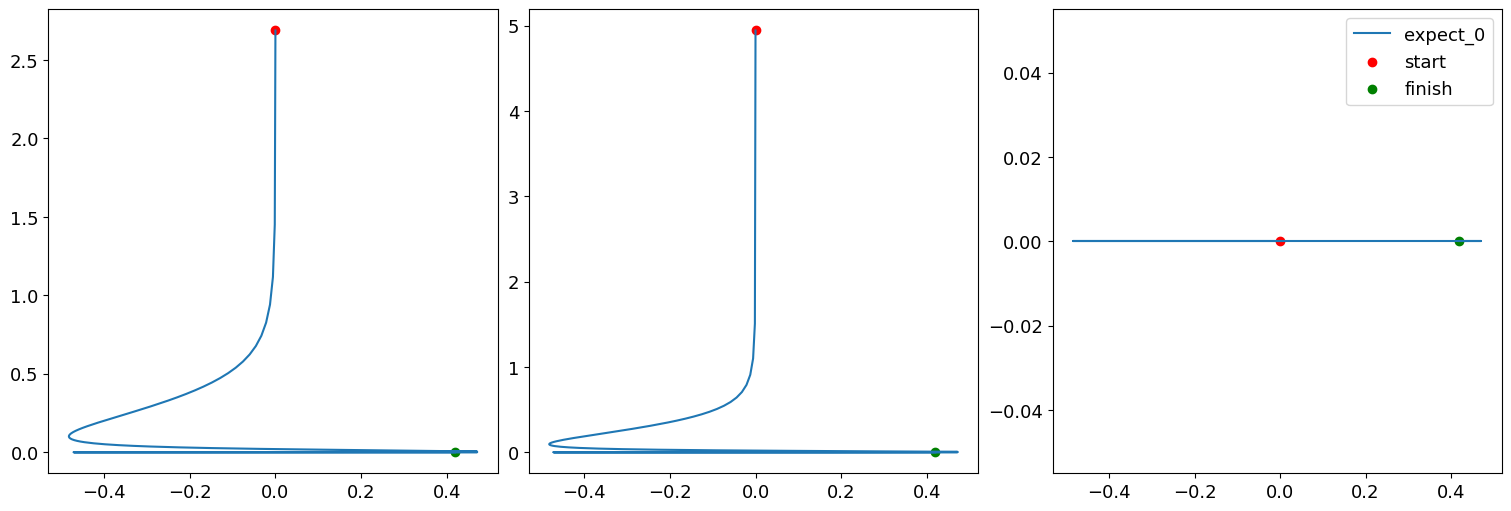

In [57]:
sim(omega = 1,
    Omega_1 = 0,
    Omega_2 = np.sin(timelst),
    gamma_2 = 3,
    rho_0_lst = [qt.coherent_dm(N, 2*np.exp(1j*2*np.pi)), qt.coherent_dm(N, 2*np.exp(1j*np.pi)), qt.coherent_dm(N, 2*np.exp(1j*1.5*np.pi))])
sim(omega = 1,
    Omega_1 = 0,
    Omega_2 = np.sin(timelst),
    gamma_2 = 3,
    rho_0_lst = [qt.coherent_dm(N, 10*np.exp(1j*1.5*np.pi)), qt.coherent_dm(N, 20*np.exp(1j*1.5*np.pi)), qt.fock_dm(N, 20)])

---

---

**With detuning, modulated driving, weakly nonlinear regime**

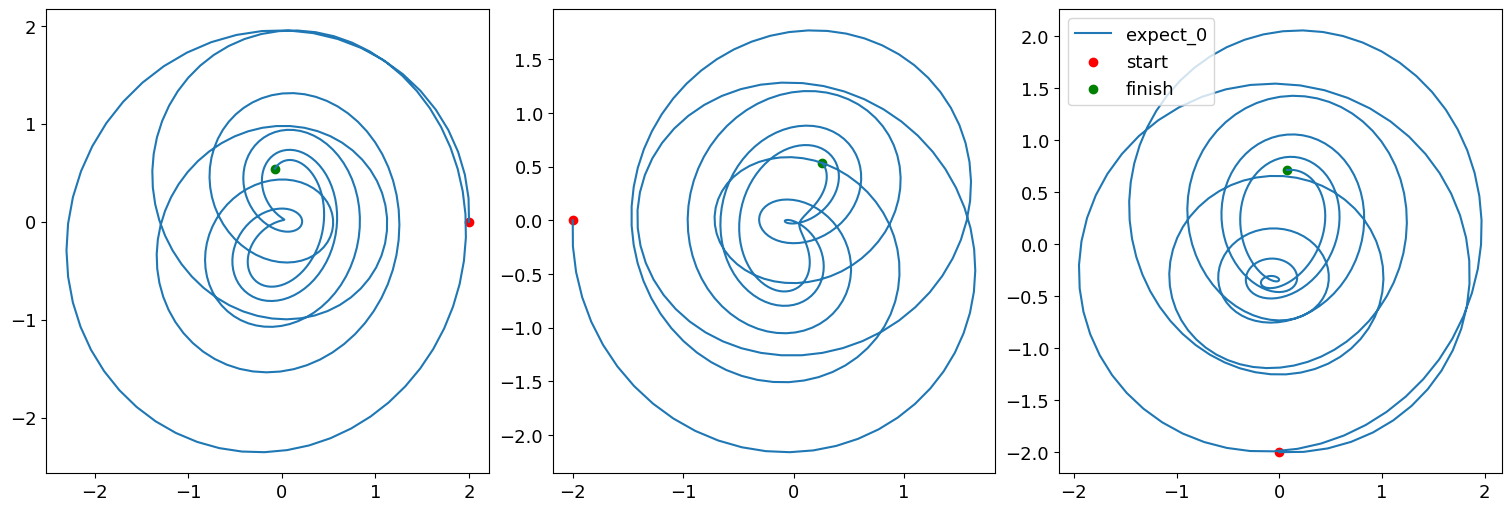

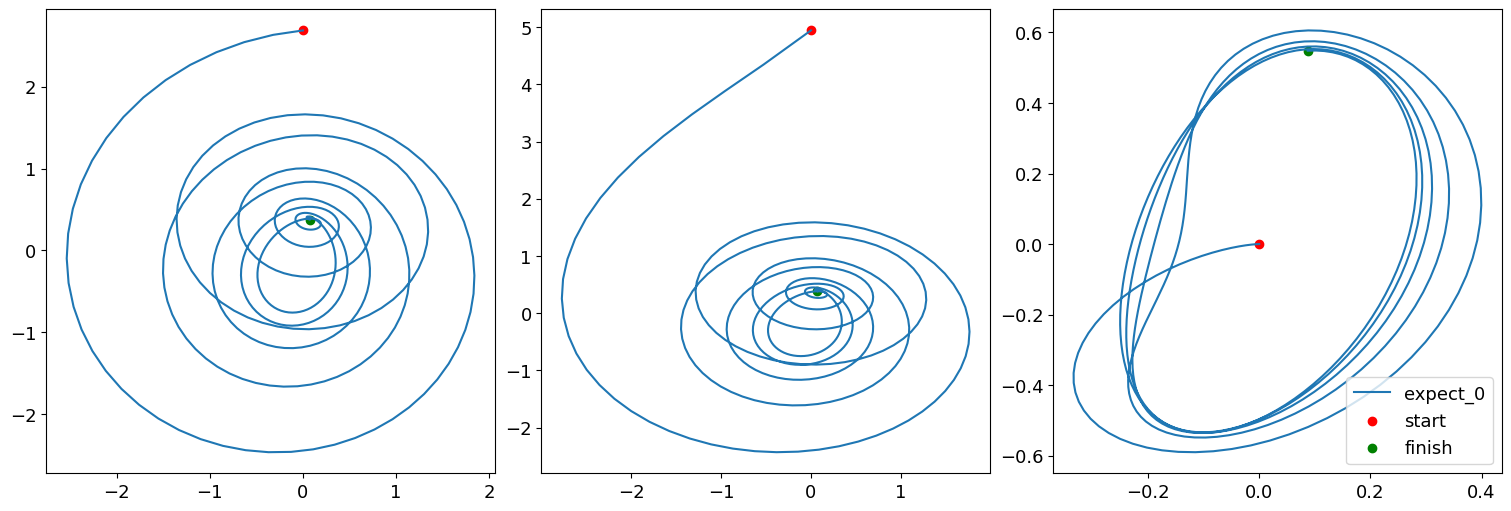

In [58]:
sim(omega = 3,
    Omega_1 = 0,
    Omega_2 = np.sin(timelst),
    gamma_2 = 0.1,
    rho_0_lst = [qt.coherent_dm(N, 2*np.exp(1j*2*np.pi)), qt.coherent_dm(N, 2*np.exp(1j*np.pi)), qt.coherent_dm(N, 2*np.exp(1j*1.5*np.pi))])
sim(omega = 3,
    Omega_1 = 0,
    Omega_2 = np.sin(timelst),
    gamma_2 = 0.1,
    rho_0_lst = [qt.coherent_dm(N, 10*np.exp(1j*1.5*np.pi)), qt.coherent_dm(N, 20*np.exp(1j*1.5*np.pi)), qt.fock_dm(N, 20)])

---

---

**With detuning, modulated driving, strongly nonlinear regime**

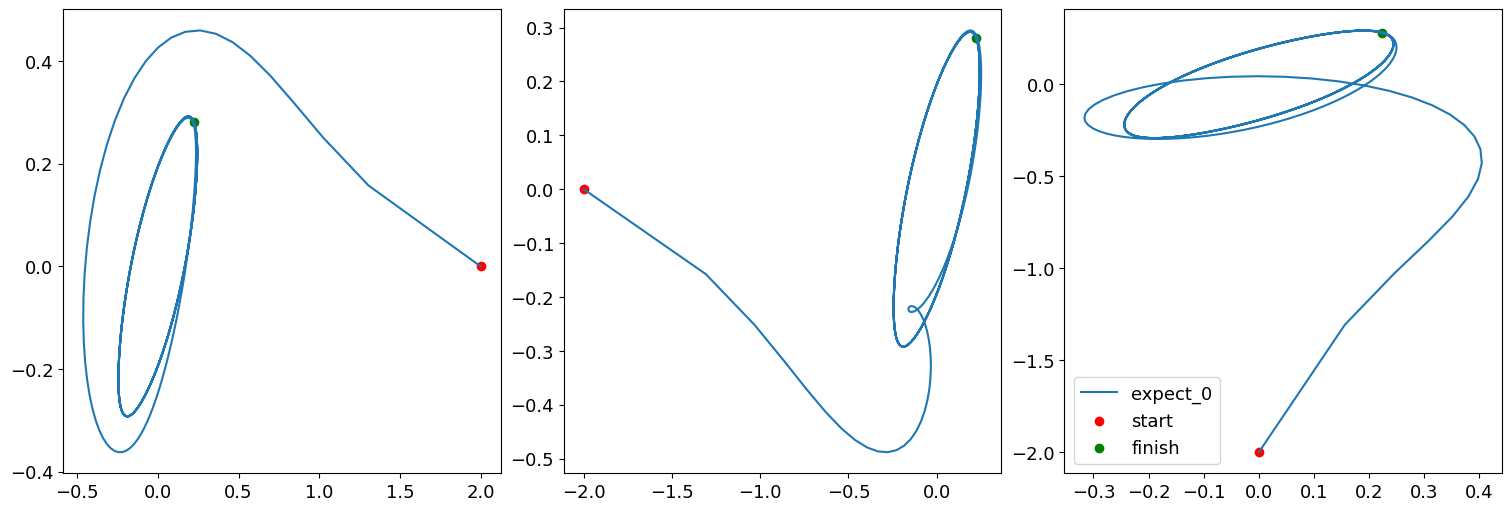

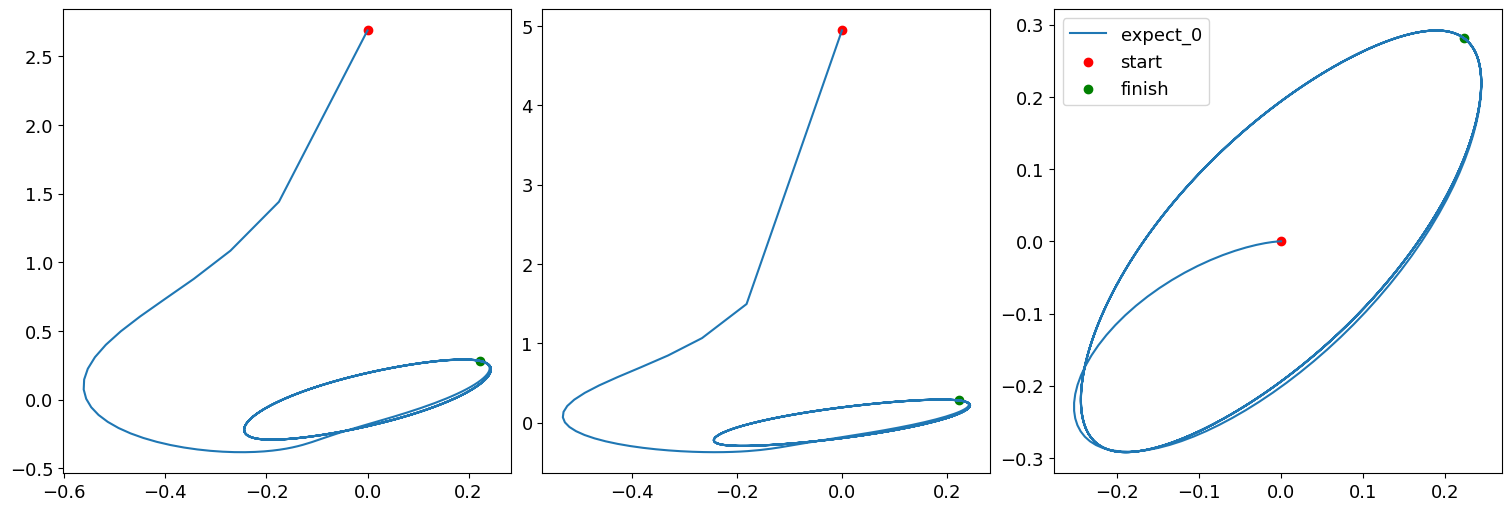

In [59]:
sim(omega = 3,
    Omega_1 = 0,
    Omega_2 = np.sin(timelst),
    gamma_2 = 3,
    rho_0_lst = [qt.coherent_dm(N, 2*np.exp(1j*2*np.pi)), qt.coherent_dm(N, 2*np.exp(1j*np.pi)), qt.coherent_dm(N, 2*np.exp(1j*1.5*np.pi))])
sim(omega = 3,
    Omega_1 = 0,
    Omega_2 = np.sin(timelst),
    gamma_2 = 3,
    rho_0_lst = [qt.coherent_dm(N, 10*np.exp(1j*1.5*np.pi)), qt.coherent_dm(N, 20*np.exp(1j*1.5*np.pi)), qt.fock_dm(N, 20)])

---

---

**Discussion**

- The phase point trajectory depends on all the parameters considered in the simulations.
- Without detuning and driving, the trajectories are simply straight lines (with a portion of backtracking).
- With driving, the trajectories differ depending whether there is detuning. With detuning present, we have spiralling motion. This is not seen in the "no detuning" cases.
- Going into the strongly nonlinear regime, the trajectories grow faster towards the steady state. For example, in the "with detuning, constant driving" cases, the number of spiral turns with respect to the distance travelled towards the steady state value decreases considerably.
- Modulation changes the trajectory.

In the end, this simulation fails to provide me with sufficient insight about the choice of trajectory for a particular case. However, there is some good information to be kept in mind. **Spirals are appropriate to use when there is detuning; otherwise, a polynomial might be a better choice. Furthermore, by modulating the driving with the StS algorithm, we should expect a resulting trajectory different from that used as the target. Nonetheless, the strength of this algorithm indeed lies in the fact that the steady state can be reached in a shorter time period.**